# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [2]:
import pandas as pd
recipe = pd.read_csv('recipe_site_traffic_2212.csv')
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [3]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
import numpy as np
# replace nan values in the 'high_traffic' column with 'Low' which depicts the recipes whose traffic are not high enough.
missing_values = ['missing', '-', '', 'NaN', None,np.nan]
recipe['high_traffic'] = recipe['high_traffic'].apply(lambda x: 'Low' if x in missing_values else x)
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [5]:
# replace nan values in the numeric columns with their respective mean values.
recipe['sugar'] = recipe['sugar'].fillna(recipe['sugar'].mean())
recipe['calories'] = recipe['calories'].fillna(recipe['calories'].mean())
recipe['protein'] = recipe['protein'].fillna(recipe['protein'].mean())
recipe['carbohydrate'] = recipe['carbohydrate'].fillna(recipe['carbohydrate'].mean())

In [6]:
# replace non-digit characters to digits and convert to integer
recipe['servings'].nunique()
recipe['servings'] = recipe['servings'].str.replace(' as a snack','')
recipe['servings'].unique()
recipe['servings'] = recipe['servings'].astype('int')

In [7]:
recipe['servings'].isna().sum()

0

In [8]:
missing_values = ['missing', '-', '', 'NaN', None,np.nan]  

cat =  ['Lunch/Snacks', 'Beverages', 'Potato',
'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']

# replace nan values with the mode of 'category'
recipe['category'] = recipe['category'].apply(lambda x: recipe['category'].mode()[0] if (x in missing_values or x not in cat) else x)
recipe

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,Lunch/Snacks,2,Low
943,944,435.939196,35.069676,9.046547,24.149296,Potato,2,High
944,945,951.740000,29.420000,3.570000,13.870000,Pork,2,High
945,946,266.610000,35.770000,0.970000,8.070000,Potato,6,High


In [9]:
recipe.shape
print(recipe['recipe'].nunique())
recipe.dtypes

947


recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings          int64
high_traffic     object
dtype: object

## Data Validation
This data set has 947 rows, 8 columns. I have validated all variables. All the columns are just as described in the data dictionary:

- recipe: Numeric; 947 unique values, same as the description. No cleaning is needed.
- calories: Numeric with missing values, same as the description. Replaced missing values with the mean of `calories` column.
- carbohydrate: numeric values with missing values, same as the description. Replaced missing values with mean of `carbohydrate` column.
- sugar: numeric values with missing values, same as the description. Replaced missing values with mean of  `sugar` column.
- protein: nnumeric values with missing values, same as the description. Replaced missing values with mean of  `protein` column.
- category: 10 categories without missing values, same as the description. No cleaning is needed.
- servings: numeric values without missing values, same as the description. Replaced some characters with appropriate digits then converted to an integer.
- high_traffic: 2 categories with missing values, same as the description. Replaced missing values with `Low`.

## Exploratory analysis
In this section, I visualized the relationships between the target variable (`high_traffic`) and its features.

## the target variable
The `high_traffic` is our target variable, thus I to visualize its count distribution.

Text(0.5, 1.0, 'Distribution of the high_traffic')

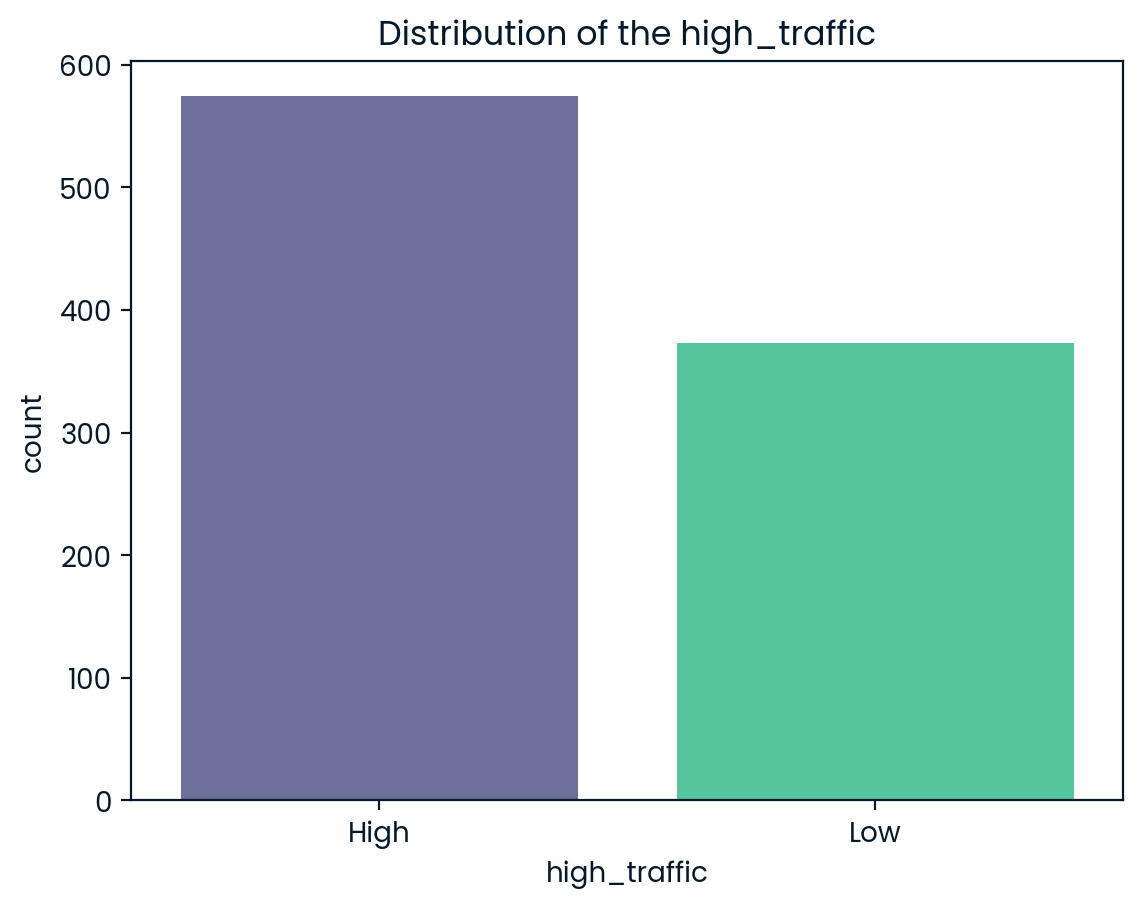

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = recipe,x='high_traffic',hue='high_traffic')
plt.title('Distribution of the high_traffic')



## relationships between the target variable and the numeric  nutrient columns(calories,protein,sugar,carbohydrate,servings)
To better undertand the features, I visualized the nutrient-numeric features against the target variable; and from the result below, all the numeric variables, except for `sugar`, had a good value score against `high_traffic`. This made a bit of sense as customers are avoiding sugary meals because of their health hazards.

[Text(0.5, 1.0, 'Carbohydrate vs High_traffic')]

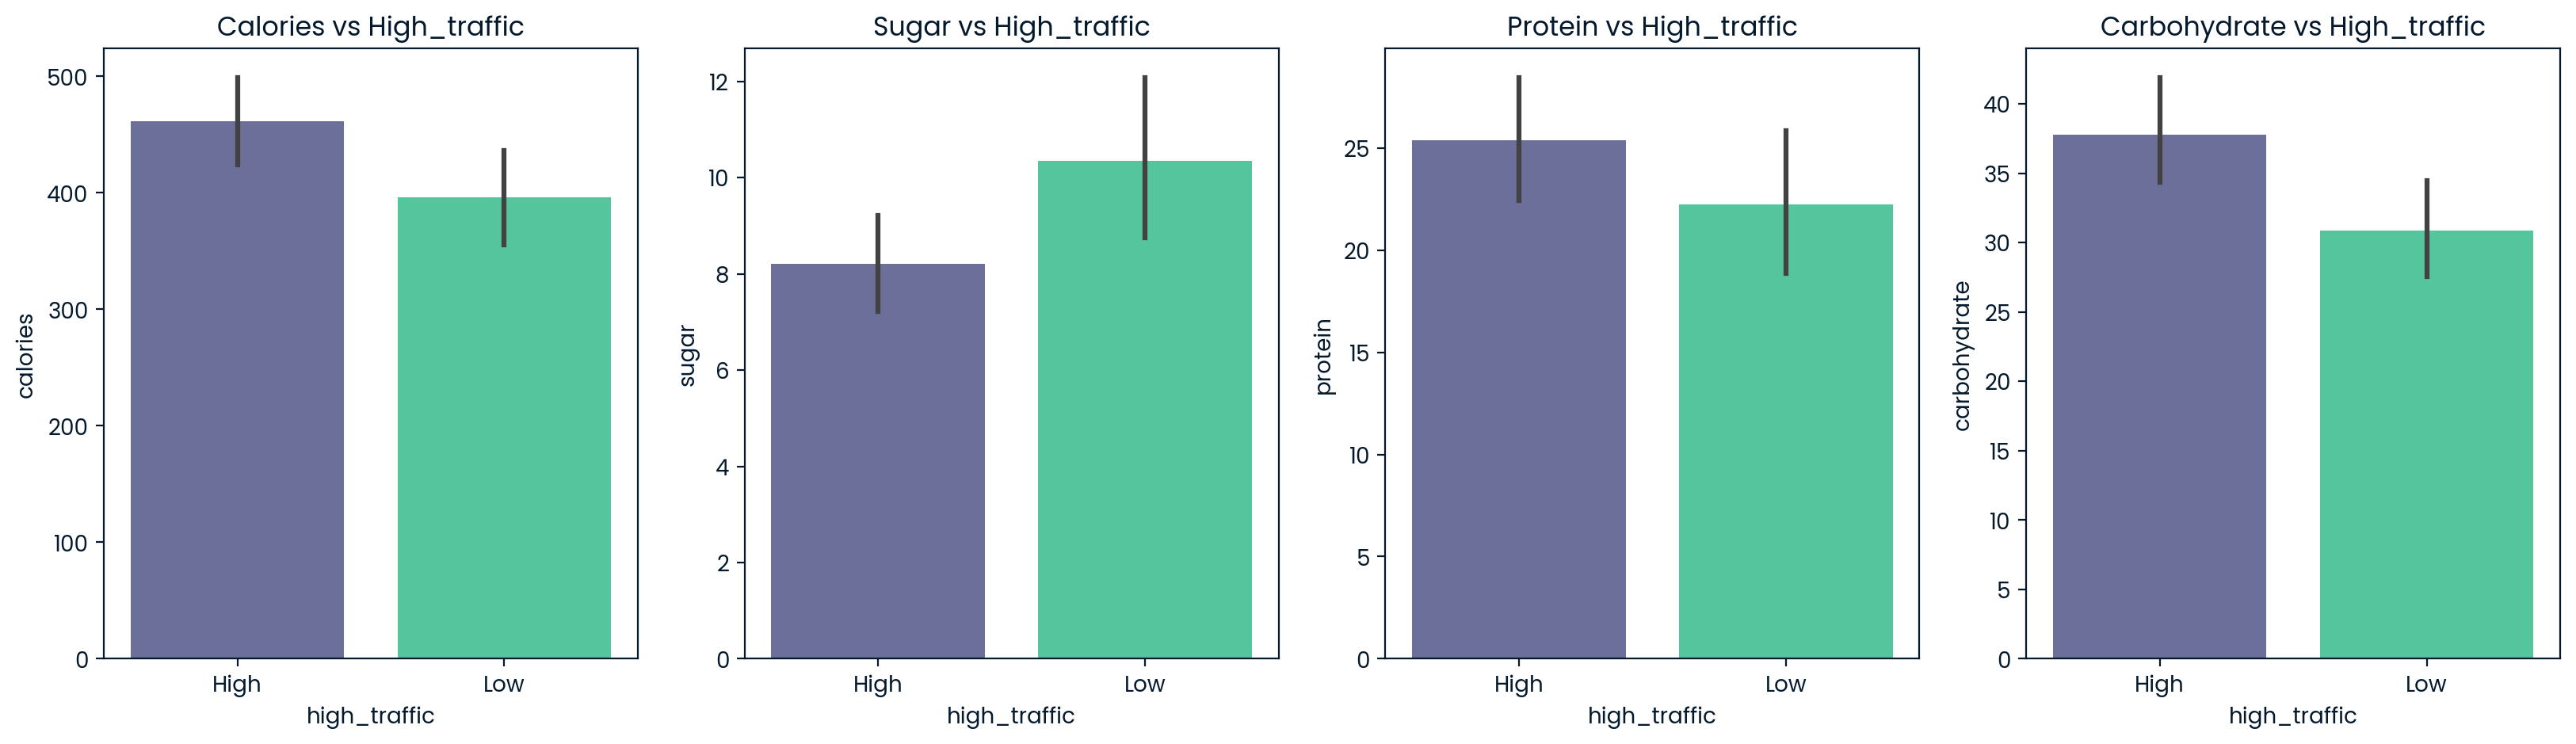

In [21]:
df = recipe.copy()
fig, axes = plt.subplots(1,4,figsize=(20,5))
sns.barplot(data=df, x='high_traffic',y='calories',hue='high_traffic',ax=axes[0]).set(title='Calories vs High_traffic')
sns.barplot(data=df, x='high_traffic',y='sugar',hue='high_traffic',ax=axes[1]).set(title='Sugar vs High_traffic')
sns.barplot(data=df, x='high_traffic',y='protein',hue='high_traffic',ax=axes[2]).set(title='Protein vs High_traffic')
sns.barplot(data=df, x='high_traffic',y='carbohydrate',hue='high_traffic',ax=axes[3]).set(title='Carbohydrate vs High_traffic')

## relationship of the categories with the target variable
In this section, I visualized the categories of meals and its relation to `high_traffic`. And from the visualization, there were some nuances. `Breakfast` for example tend to have lower traffics, but we do not what were the Breakfasts made of that made the customers not yearn for them. Also the `chicken` is a bit off as chicken meat is quite healthy; perhaps it has to do with the way they were prepared, I can't really tell. Nonetheless, `Beverages` made sense as most beverages contains a supple of sugar.

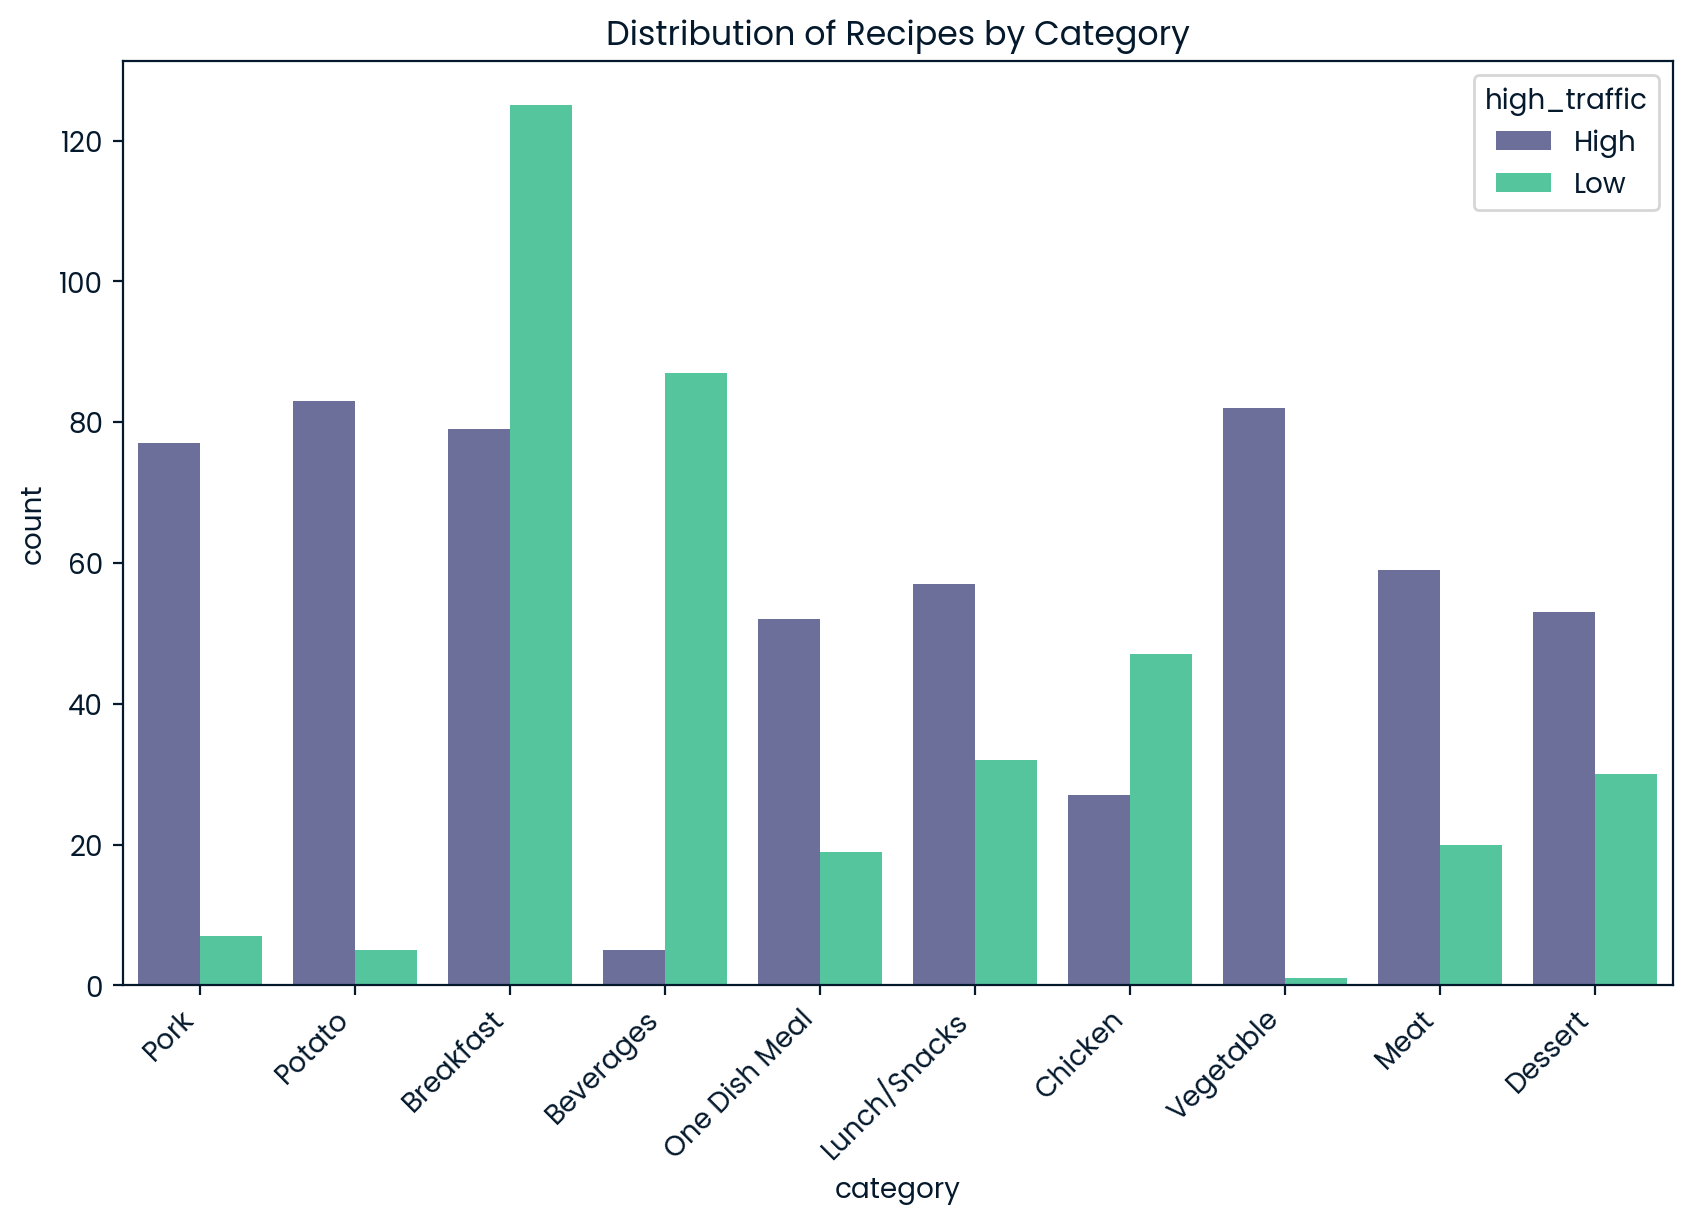

In [12]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='category', data=df, hue='high_traffic')  
plt.title('Distribution of Recipes by Category')
plt.xticks(rotation=45, ha='right') 
plt.show()

## relationship of the `category` against `servings`
From this visualization, I found out that the traffic driven by the average servings for each category varied across each type of meal with `Breakfast` having the least variation.


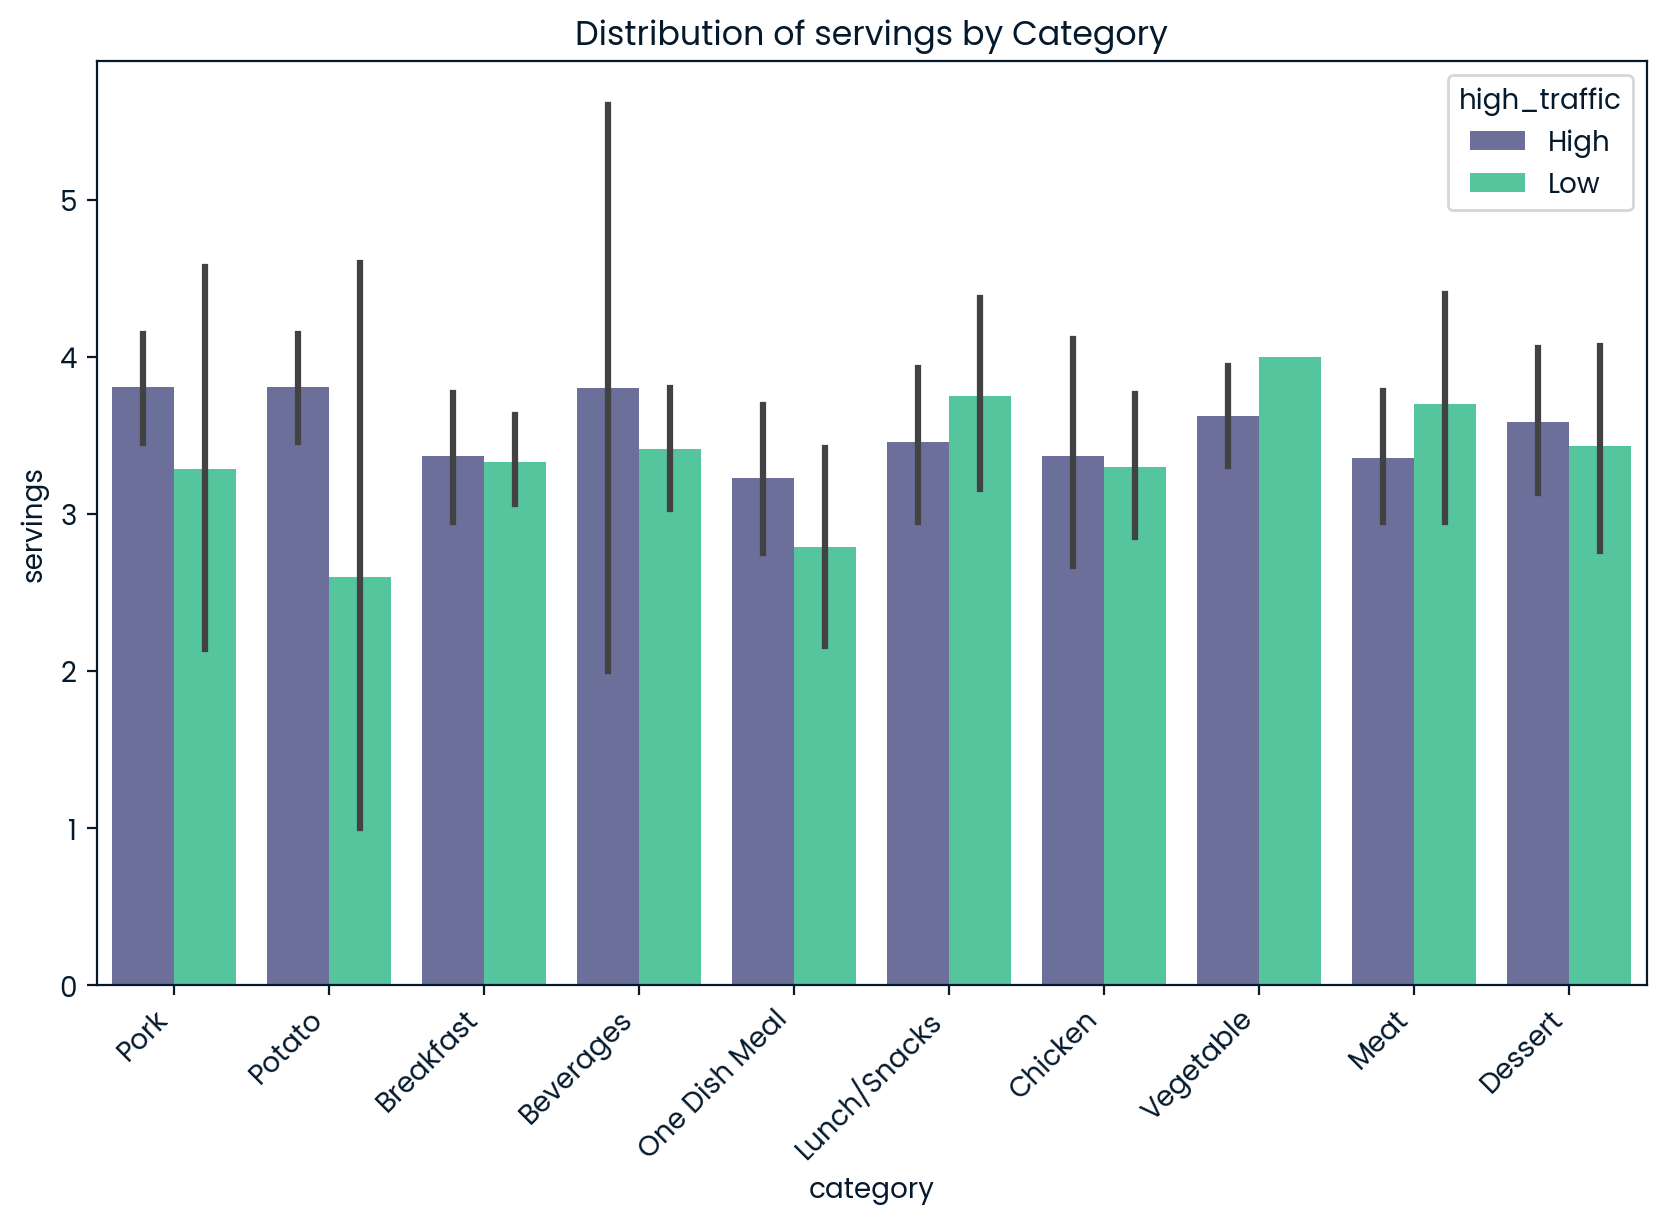

In [13]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='category',y = 'servings', data=df,hue = 'high_traffic')  
plt.title('Distribution of servings by Category')
plt.xticks(rotation=45, ha='right') 
plt.show()

## relationship of servings with high_traffic
From the visualization, high-traffic recipes barely had a higher servings than the moderate or `Low`-traffic ones.


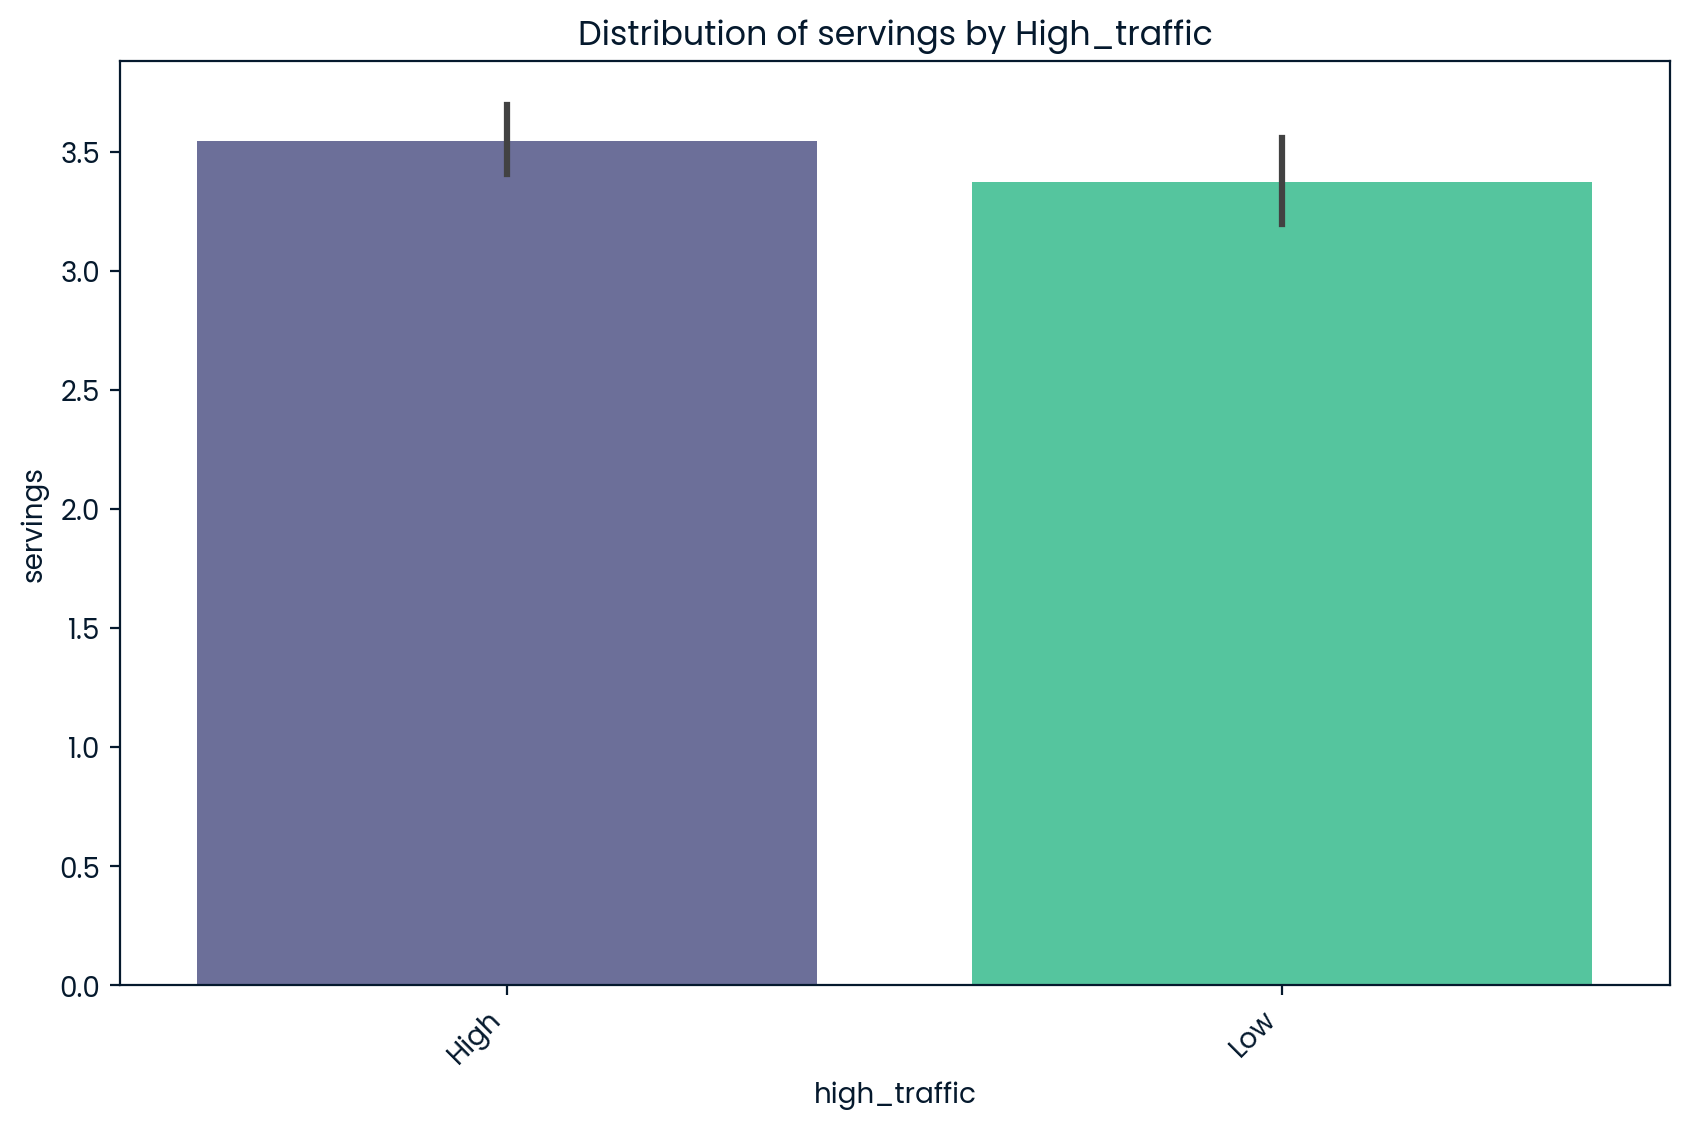

In [101]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='high_traffic',y = 'servings', data=df,hue = 'high_traffic')  
plt.title('Distribution of servings by High_traffic')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Model fitting and Evaluation
Since our target column is categorical in nature, this is a classification problem. I used the LogisticRegression for the baseline model because Logistic regression is generally computationally efficient, especially with smaller datasets and also harmonises well with binary-like categories, and the DecisionTree classifier as the comparison model because Decision trees can capture non-linear relationships and interactions between features without requiring much feature engineering.

As for the evaluation, I used accuracy_score test, since the company is interested in the predicting the traffic 80% of the time.

 ## Prepare Data for Modelling
To enable modelling, I chose all feature columns except `recipe`, then `high_traffic` as target variable. I also have made the following changes:

- Label-encode the target variable
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['high_traffic'] = labelencoder.fit_transform(df['high_traffic'])

In [23]:
df = pd.get_dummies(df,columns = ['category'])


In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['high_traffic','recipe'],axis=1)
y = df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,random_state=48)

## Logistic Regression model

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=42)  
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7789


## finding the best parameter for the Logistic Regression model

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

#  Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = LogisticRegression(solver='liblinear', random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# 15. Evaluate the best model
print(accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 10, 'penalty': 'l2'}
0.775438596491228


## feature importance of the Logistic Regression

calories: -0.0002
carbohydrate: -0.0014
sugar: 0.0095
protein: -0.0029
servings: -0.0532
category_Beverages: 2.9802
category_Breakfast: 0.9230
category_Chicken: 1.4417
category_Dessert: -0.2376
category_Lunch/Snacks: 0.0738
category_Meat: -0.3702
category_One Dish Meal: -0.2163
category_Pork: -1.2597
category_Potato: -1.6552
category_Vegetable: -2.0217


<AxesSubplot: ylabel='None'>

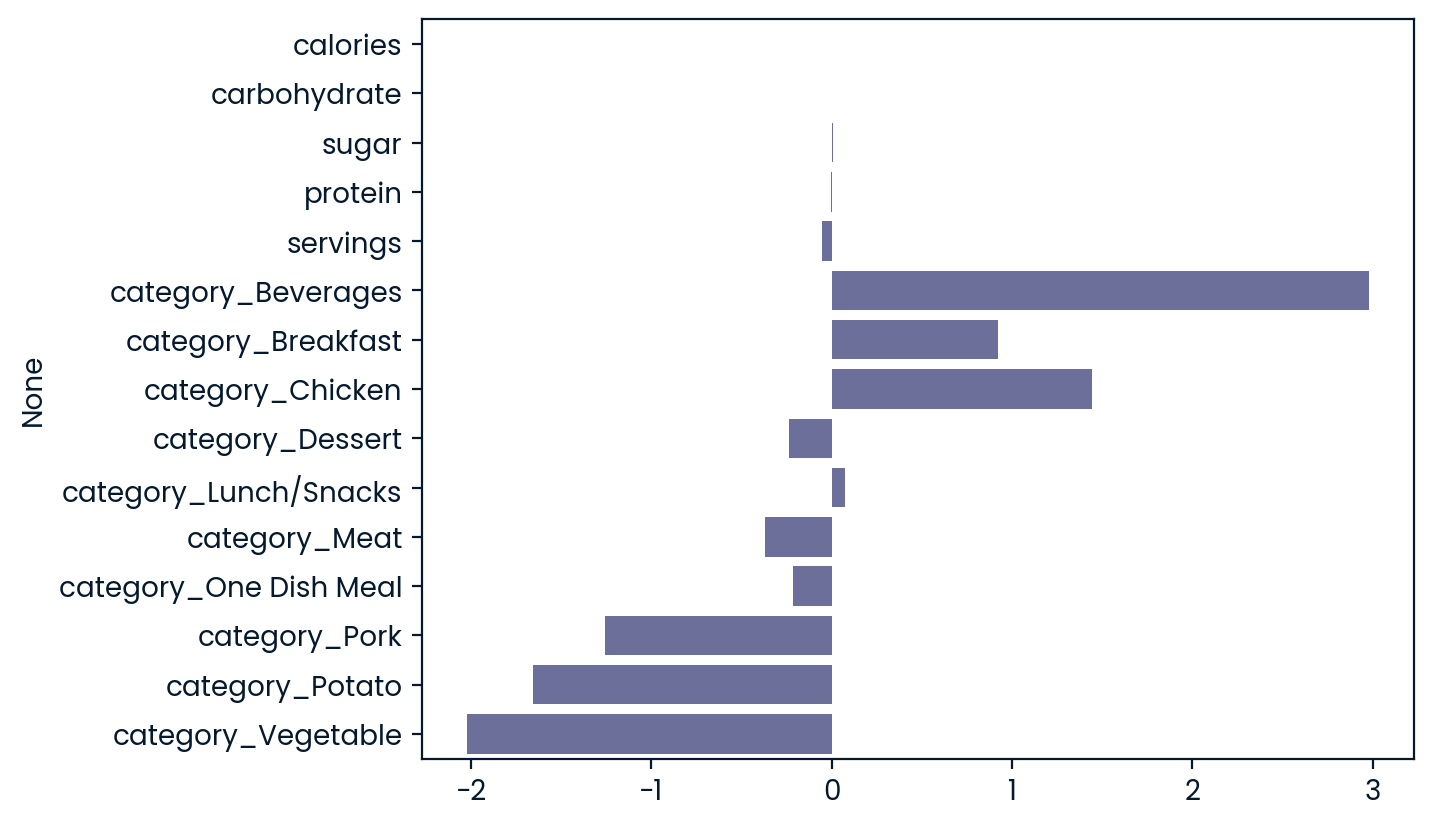

In [27]:


coefficients = model.coef_[0]    

# Print coefficients along with feature names
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")
sns.barplot(x = coefficients, y = X_train.columns)

## The Decision Tree Classifier model

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import VotingClassifier

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, max_features = None, min_samples_leaf = 4, min_samples_split = 10)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7824561403508772


## finding the best parameters

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Create GridSearchCV
grid_search = RandomizedSearchCV(tree, param_grid, cv=5, scoring='accuracy')  

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)

# Make predictions
y_pred = best_tree.predict(X_test)

# Evaluate the model

print('Accuracy:', best_tree.score(X_test, y_test))

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
Accuracy: 0.7824561403508772


## feature importance

In [30]:

importances = best_tree.feature_importances_

# Print feature importances along with feature names
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance:.4f}")

calories: 0.1094
carbohydrate: 0.1205
sugar: 0.1063
protein: 0.2184
servings: 0.0206
category_Beverages: 0.1055
category_Breakfast: 0.0949
category_Chicken: 0.0741
category_Dessert: 0.0082
category_Lunch/Snacks: 0.0250
category_Meat: 0.0000
category_One Dish Meal: 0.0006
category_Pork: 0.0594
category_Potato: 0.0000
category_Vegetable: 0.0570


<AxesSubplot: ylabel='None'>

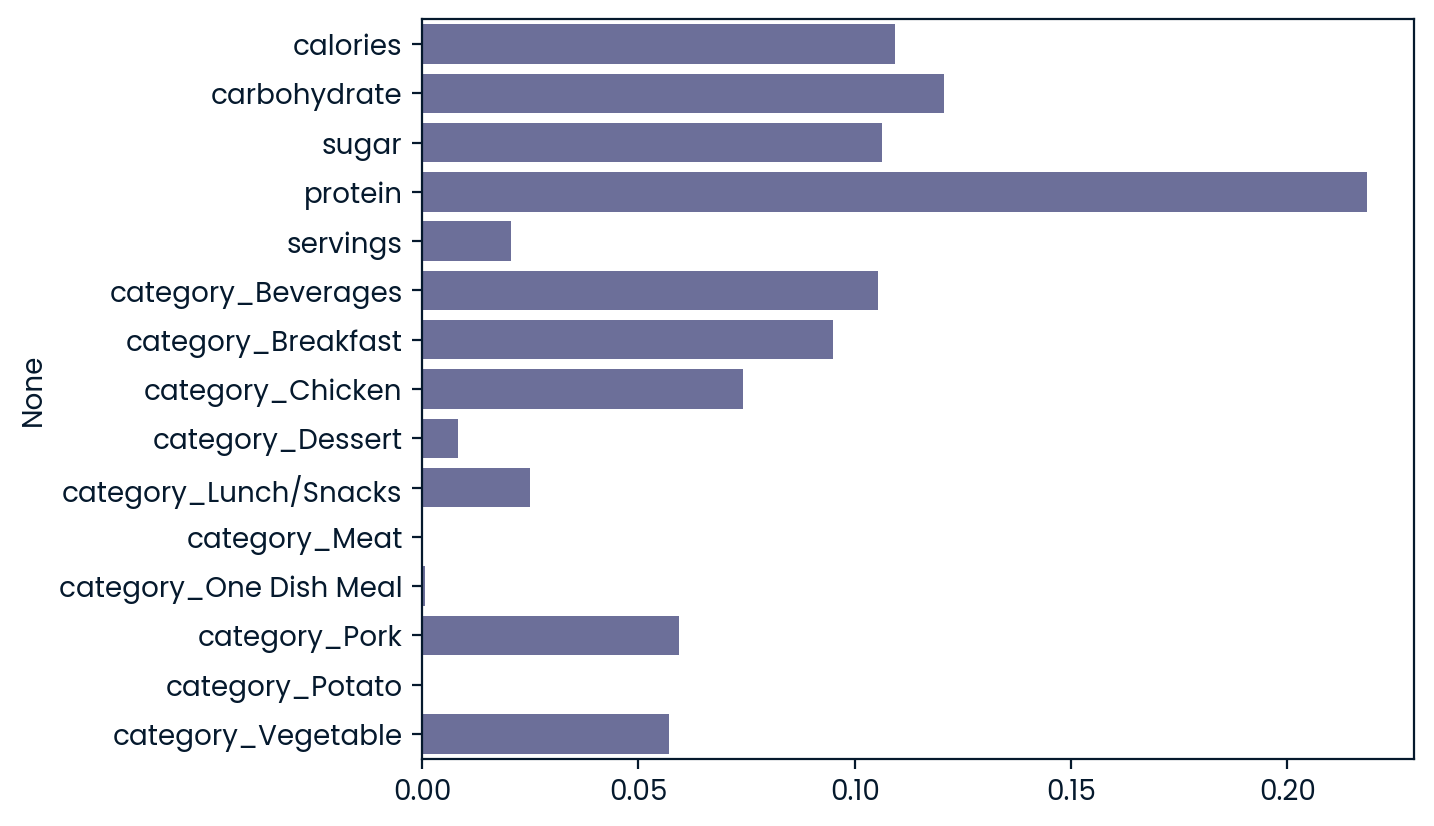

In [31]:
sns.barplot(x= importances, y = X_train.columns)

## Results
* The Logistic Regression gave an accuracy of 77.89%
* The DecisionTreeClassifier gave an accuracy of 78.2%

## Business metric
The business metric here would be the predictive accuracy of the models. Since the accuracy of the models are roughly 78%, 22% of `high_traffic` recipes would be falsely predicted. Thus, the business should monitor if the predictions would actually perform well oe even better than the handpicked recipes, and if such predictions would improve traffics up to 40%.

## Recommendations
* Variables like cost_per_servings,`time_to_make` and even `ingredients` could potentially be valuable in the prediction og `high_traffic`
* Use the key metric and models to monitor the traffic over time as the dataset increases gradually.
* Fully deploy the model using good deployment strategy, such as a web or mobile application or API.
